<a href="https://colab.research.google.com/github/takahashi0329/DeepLerarning2022Late/blob/main/CNN%E3%81%A7%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNNで画像分類
##CNNでCIFAR-10の画像データを訓練し、ネットなどの任意の画像を正しく分類できるかどうかを確認

##学習用のライブラリを読み込む

In [1]:
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout

#データセットと表示用ライブラリもimportする
##データセットはtensorflow内のCLFA-10

In [2]:
import tensorflow as tf #CLFAR10のために読み込む
from matplotlib import pyplot #グラフのプッロト表示
import numpy as np #データ計算
import cv2 # computer vison 画像を取り扱う

## CIFAR10を読み込む

In [3]:
cifar = tf.keras.datasets.cifar10

###CIFAR10からデータを読み込んで学習用とテスト検証用に振り分ける

In [4]:
(X_train, y_train), (x_test,y_test) = cifar.load_data() #データをロード

170498071/170498071 [==============================] - 6s 0us/step


###CIFAR10の答え用キーワード（ラベル）の配列を用意

In [5]:
labels = ["飛行機","自動車","鳥","猫","鹿","犬","カエル","馬","船","トラック"]

##ロードしたデータを加工する

In [6]:
x_train = X_train.astype("float32") / 255 #データの値を255で割って学習用にする
x_test = x_test.astype("float32") / 255

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
# ロードしたデータの数を確認
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

50000
10000
50000
10000


##ダウンロードした画像を表示する

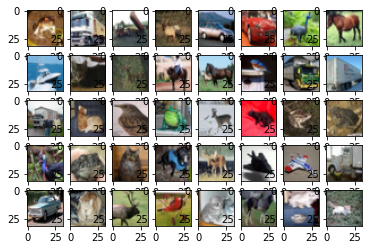

In [9]:
from PIL import Image
for i in range(0,40):
  im = Image.fromarray(X_train[i])
  pyplot.subplot(5, 8, i+1)
  pyplot.imshow(im)
  #繰り返し終わり
pyplot.show()

##CNNの学習モデルを組み立てていく

In [10]:
#層をたくさん追加するので、リストでまとめて追加する
num_classes = len(labels) #分類数
in_shape = (32, 32, 3)
model =Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=in_shape),
    tf.keras.layers.Activation('relu'),
    Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.Activation('relu'),
    Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512),
    tf.keras.layers.Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    tf.keras.layers.Activation('softmax'),
])

##組み立てたデータをコンパイルする

In [11]:
model.compile(
    loss = 'categorical_crossentropy', #損失の計算方法
    optimizer = 'adam', #最適化の方法
    metrics = ['accuracy'] #評価の基準、計算方法(accuracy=精度)
)

##組み立てた学習モデルで訓練する

In [12]:
fit = model.fit(
    x_train, y_train, #学習用問題データとその正解(ラベル)
    batch_size = 128, #まとめて学習する量
    epochs = 100, #学習を繰り返す回数
    verbose = 1, #ログを出力のフラグ(標準出力に出力する)
    validation_data = (x_test, y_test) #学習中の検証チェック用データ
)

Epoch 1/100
391/391 [==============================] - 13s 12ms/step - loss: 1.6304 - accuracy: 0.4046 - val_loss: 1.2627 - val_accuracy: 0.5544
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.2435 - accuracy: 0.5560 - val_loss: 1.0522 - val_accuracy: 0.6230
Epoch 3/100
391/391 [==============================] - 4s 11ms/step - loss: 1.0724 - accuracy: 0.6179 - val_loss: 0.9338 - val_accuracy: 0.6645
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 0.9545 - accuracy: 0.6639 - val_loss: 0.8880 - val_accuracy: 0.6842
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 0.8739 - accuracy: 0.6942 - val_loss: 0.8421 - val_accuracy: 0.7062
Epoch 6/100
391/391 [==============================] - 5s 12ms/step - loss: 0.8098 - accuracy: 0.7151 - val_loss: 0.7725 - val_accuracy: 0.7335
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 0.7570 - accuracy: 0.7347 - val_loss: 0.7299 - val_accuracy

##訓練の状況を確認する

In [13]:
# 訓練の精度の経過を取得
acc = fit.history['accuracy']
# 訓練の損失の経過を取得
loss = fit.history['loss']
# 訓練の回数を算出
epochs = range(len(acc))

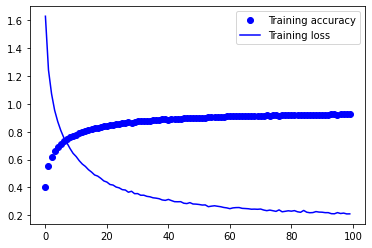

<Figure size 432x288 with 0 Axes>

In [14]:
# accとlossの値をプロットしていく
# 精度(acc)を青いドットで(bo)でプロット
pyplot.plot(epochs, acc, 'bo', label='Training accuracy')
# 損失(loss)を青線(b)でプロット
pyplot.plot(epochs, loss, 'b', label='Training loss')
# 凡例をつける
pyplot.legend()
# 描画領域を設定
pyplot.figure()
pyplot.show() #表示

##訓練した学習モデルで検証する

In [15]:
# コンパイルで指定したmetrics = accuracyで評価
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.7232 - accuracy: 0.8024 - 970ms/epoch - 3ms/step


[0.7231988310813904, 0.8023999929428101]

# 学習済みのモデルに分類させていく
## 直接分類させるモデルにラッピングする

In [16]:
probability_model = Sequential([
    model, 
    tf.keras.layers.Softmax()
])

## テスト検証データの一部を分類させる

['猫', '船', '船', '飛行機', 'カエル', 'カエル', '犬', 'カエル']


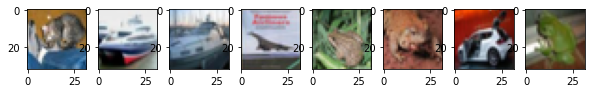

In [17]:
tests = x_test[:8] #一部を切り抜く
# 切り抜いたデータをプロットで表示
pyplot.figure(figsize=(10, 10))
for i in range(0, len(tests)):
  pyplot.subplot(1, len(tests), i+1)
  pyplot.imshow(tests[i], cmap='gray')
#ループ終わり
# testsの内容を表示出来たら、分類用のprobability_modelに分類させる(解答させる)
r = probability_model(tests) #分類結果を変数rに代入
# print(r)
# 分類結果の回答(r)の中から各行の一番高い確率を抜き出して、そのインデックスを格納する配列を用意
result = []
# ループしながらrに追加していく
for i in np.argmax(r.numpy(), axis=1):
  result.append(labels[i])
#ループ終わり
print(result)

#画像をアップロードする処理を作る

Saving deer.jpg to deer.jpg


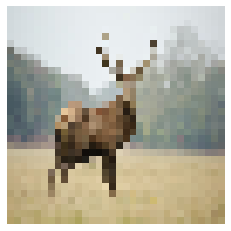

In [28]:
from google.colab import files
r = files.upload() #ファイルをアップロード(ボタンが出る)
if len(r) == 0: #もしデータが空だったら、失敗とみなす
   print("ファイルをアップロードできませんでした")
else: #成功ルート
   filename = list(r.keys())[0] #データのキーの先頭をファイル名として取得
   img = cv2.imread(filename) # 画像データを読み込む
   import os
   os.remove(filename) #ファイルを掃除
   # 画像データの色情報の方式を変換ComputerVisionのBGRからRGBに変換
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #変換してimg上書き
   img = cv2.resize(img,(32,32)) #リサイズしてimgを上書き
   pyplot.imshow(img) 
   pyplot.axis("off")
   pyplot

## アップロードした画像を分類させる

In [29]:
 #画像データを学習データと同じ形に整形する
img = img.reshape(1, 32, 32, 3)
ans = probability_model([img]) #学習済みのモデルで判断
print(ans) #分類結果を表示

tf.Tensor(
[[0.08533675 0.08533675 0.08533675 0.08533675 0.08533675 0.08533675
  0.08533675 0.23196931 0.08533675 0.08533675]], shape=(1, 10), dtype=float32)


##labels = ["飛行機","自動車","鳥","猫","鹿","犬","カエル","馬","船","トラック"]

###一番高い可能性のインデックスをキーワードに変換して表示

In [30]:
answer_idx = int(np.argmax(ans, axis=1))
print(answer_idx)
answer_word = labels[answer_idx]
print("この画像は" + answer_word + "です")

7
この画像は馬です
